In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error


In [3]:
# Load and preprocess the training data
training_set = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = training_set.iloc[:, 1:2].values  # Extract the stock prices (second column)

# Scale the data using MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

# Prepare the training data (X_train and y_train)
X_train = training_set[0:1257]  # Input data (previous day's price)
y_train = training_set[1:1258]  # Output data (current day's price)
X_train = np.reshape(X_train, (1257, 1, 1))  # Reshaping for LSTM input


In [4]:
# Build the RNN model (LSTM)
regressor = Sequential()
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))  # LSTM layer
regressor.add(Dense(units=1))  # Output layer
regressor.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model

# Train the model
regressor.fit(X_train, y_train, batch_size=32, epochs=200)


Epoch 1/200
40/40 [==============================] - 2s 6ms/step - loss: 0.0913
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0835
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0814
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0796
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0778
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0760
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0741
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0722
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0703
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0682
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0662
Epoch 12/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0640
Epoch 13/200
40/40 [=================

In [5]:
# Load and preprocess the test data
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values  # Extract the stock prices (second column)

# Prepare the inputs for prediction (test data)
inputs = real_stock_price
inputs = sc.transform(inputs)  # Scale the inputs
inputs = np.reshape(inputs, (20, 1, 1))  # Reshaping for LSTM input


1/1 [==============================] - 0s 201ms/step


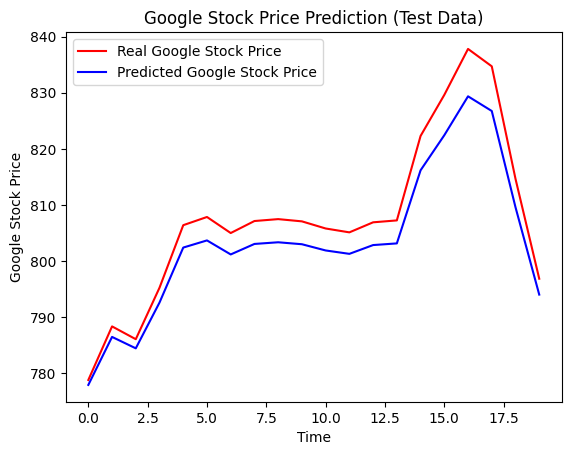

In [6]:
# Predict the stock prices using the trained model
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # Inverse transform to original scale

# Visualize the real vs predicted stock prices for test data
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (Test Data)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


40/40 [==============================] - 0s 2ms/step


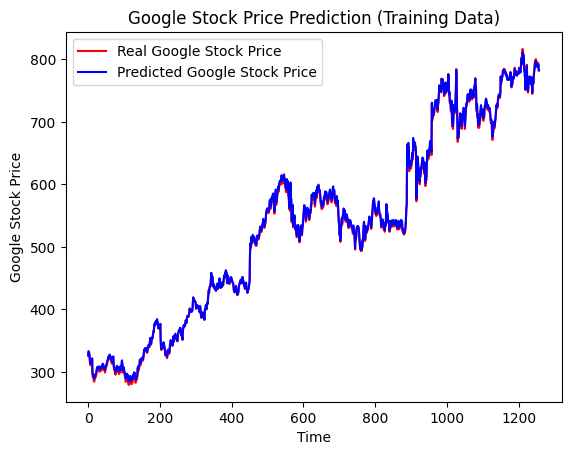

In [7]:
# Visualize the real vs predicted stock prices for training data
real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price_train = real_stock_price_train.iloc[:, 1:2].values
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)  # Inverse transform

# Plot training data predictions
plt.plot(real_stock_price_train, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price_train, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (Training Data)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [8]:
# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f'RMSE: {rmse}')


RMSE: 4.652527179747066
